##**Importing the Requisite Libraries**

In [2]:
import csv
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Analysis of the Train Datasets**

##<font color='blue'><b> **Loading the Train Datasets**</b></font>

In [3]:
train_ben= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train_Beneficiarydata.csv')
train_inpat= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train_Inpatientdata.csv')
train_outpat= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train_Outpatientdata.csv')
train_y= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train.csv')

In [ ]:
train_ben.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40


In [ ]:
train_ben.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [ ]:
train_inpat.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_inpat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [ ]:
train_outpat.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [ ]:
train_outpat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [ ]:
train_y.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [ ]:
print("Shape of Train Beneficiary file Data:",train_ben.shape)
print("Shape of Train In-patient file Data:", train_inpat.shape)
print("Shape of Train Out-patient file Data:", train_outpat.shape)
print("Shape of Train file Data:", train_y.shape)

Shape of Train Beneficiary file Data: (138556, 25)
Shape of Train In-patient file Data: (40474, 30)
Shape of Train Out-patient file Data: (517737, 27)
Shape of Train file Data: (5410, 2)


In [ ]:
out_prov= np.unique(train_outpat['Provider'])
print("The number of Unique Providers in the Train_Outpat file:", len(out_prov))

in_prov= np.unique(train_inpat['Provider'])
print("The number of Unique Providers in the Train_Inpat file", len(in_prov))

com_prov= set(out_prov).intersection(set(in_prov))
print("The number of Providers common to both the Inpat and Outpat files:",len(com_prov))

uni_ele= len(out_prov)+len(in_prov)-len(com_prov)
print("Total Number of Unique Providers in Outpatient and Inpatient datasets Together:",uni_ele)

The number of Unique Providers in the Train_Outpat file: 5012
The number of Unique Providers in the Train_Inpat file 2092
The number of Providers common to both the Inpat and Outpat files: 1694
Total Number of Unique Providers in Outpatient and Inpatient datasets Together: 5410


##<font color='green'><b> **Observations on the Train Datasets**</b></font>

1. We observed that the labels of Potential Fraud as "Yes" or "No" have been  provided to the each of the Providers in the dataset.

2. The number of Unique Providers in the Dataset is 5410 as can be seen in the  "Train" file.

3. Hence,checking for the unique Providers in the Inpatient and the Outpatient files.

4. From the above, we observed that that the total number of Providers are spread across the Inpatient and Outpatient Files.


###<font color='blue'><b>**Looking at the diffeerent columns present in each of the datasets**</b></font>

In [ ]:
print("The columns in the Outpatient Dataset are:",train_outpat.columns)
print("="*100)
print("The columns in the Inpatient Dataset are:",train_inpat.columns)
print("="*100)
print("The columns in the Beneficiary Dataset are:",train_ben.columns)

The columns in the Outpatient Dataset are: Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')
The columns in the Inpatient Dataset are: Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
  

###<font color='blue'><b>Checking for common columns between the Outpatient and the Ipatient datasets seperately </b></font>

In [ ]:
#Checking each of the columns in the Outaptient dataset if they are present in the Inpatient Dataset
c_o=[]
for o in train_outpat.columns:
    if o in train_inpat.columns:
        c_o.append(o)

#Checking each of the columns in the Inpatient dataset if they are present in the Outpatient dataset
c_i=[]
for i in train_inpat.columns:
    if i in train_outpat.columns:
        c_i.append(i)
print("Cols of Outpatient dataset also present in Inpatient dataset",len(c_o))
print("Cols of Inpatient dataset also present in Outpatient dataset",len(c_i))

#Checking for common column names in the outpatient and the inpatient datasets 
c_s= set(c_o).intersection(set(c_i))
c_s= list(c_s)
print("Common columns between the outpatient and the inpatient datasets",len(c_s))

Cols of Outpatient dataset also present in Inpatient dataset 27
Cols of Inpatient dataset also present in Outpatient dataset 27
Common columns between the outpatient and the inpatient datasets 27


In [ ]:
print(c_s)

['BeneID', 'ClmProcedureCode_1', 'ClmDiagnosisCode_3', 'OperatingPhysician', 'ClaimStartDt', 'ClmProcedureCode_4', 'DeductibleAmtPaid', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_8', 'OtherPhysician', 'ClmProcedureCode_3', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_9', 'ClmProcedureCode_5', 'AttendingPhysician', 'ClmDiagnosisCode_5', 'ClmProcedureCode_6', 'ClmProcedureCode_2', 'ClmDiagnosisCode_10', 'ClaimEndDt', 'ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_6', 'Provider', 'ClaimID', 'InscClaimAmtReimbursed', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_4']


###<font color='blue'><b> Merging the Outpatient and the Inpatient datasets based on the common columns between both the datasets. We will be doing an outer merge as we need to take the union of all the elements in both the datasets </b></font> 

In [ ]:
train_fin_df= pd.merge(train_inpat,train_outpat,left_on=c_s,right_on=c_s,how='outer')
train_fin_df.shape

(558211, 30)

In [ ]:
train_fin_df.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


###<font color='blue'><b>Merging the resultant dataset with Beneficiary data on the BeneID column in both teh datasets</b></font>

In [ ]:
train_fin= pd.merge(train_fin_df,train_ben, left_on='BeneID',right_on= 'BeneID',how='outer')
train_fin.shape

(558211, 54)

In [ ]:
print("The columns in the final merged dataset are:",train_fin.columns)

The columns in the final merged dataset are: Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',

###<font color='blue'><b>Merging the Y variable with the final dataset</b></font>

In [ ]:
train_fin= pd.merge(train_fin,train_y,left_on= 'Provider',right_on='Provider',how='outer')
train_fin.shape

(558211, 55)

In [ ]:
train_fin.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCon

In [ ]:
train_fin.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,NaN,0.0,NaN,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932-05-01,NaN,1,1,0,39,310,12,12,1,1,1,2,2,2,2,1,2,2,2,24000,2136,450,200,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,1913-12-01,NaN,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,1922-10-01,NaN,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,1930-07-01,NaN,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,Yes


###<font color="blue"><b>Checking for the datatypes of all the columns in the final dataset</b></font>

In [ ]:
train_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   AdmissionDt                      40474 non-null   object 
 10  ClmAdmitDiagnosisCode            145899 non-null  object 
 11  DeductibleAmtPaid                557312 non-null  float64
 12  Di

In [ ]:
#Storing the final dataframe as a pickled file
with open('/content/drive/MyDrive/Colab Notebooks/train_fin.pkl','wb') as tr_df:
    pickle.dump(train_fin,tr_df)

In [ ]:
#Loading the pickled file
with open('/content/drive/MyDrive/Colab Notebooks/train_fin.pkl','rb') as tr_df:
    train_fin= pickle.load(tr_df)

In [ ]:
train_fin.shape

(558211, 55)

##<font color='blue'><b> **Looking at the Class Distribution in the Train Dataset**</b></font>

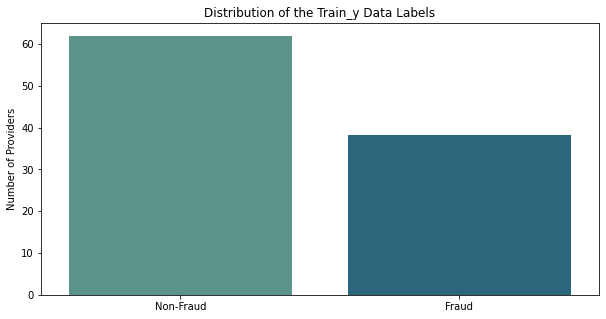

In [ ]:
#Calculating the number of row items where the Provider is NOT a Potentila fraud in percentage terms
tr_no_per= np.round((train_fin["PotentialFraud"].value_counts()[0])/(train_fin["PotentialFraud"].value_counts()[0]+train_fin["PotentialFraud"].value_counts()[1]),3)*100

#Calculating the number of row items where the Provider is a Potentila fraud in percentage terms
tr_yes_per= np.round((train_fin["PotentialFraud"].value_counts()[1])/(train_fin["PotentialFraud"].value_counts()[0]+train_fin["PotentialFraud"].value_counts()[1]),3)*100

#Plotting the Potential and Non Potential Fraud scenarios
plt.figure(figsize=(10,5))
sns.barplot(x=['Non-Fraud',"Fraud"],y= [tr_no_per,tr_yes_per],palette='crest')
plt.ylabel("Number of Providers")
plt.title("Distribution of the Train_y Data Labels")
plt.show()

In [ ]:
print("Percenatage of Non-Fraud class in Train dataset:",tr_no_per,'%')
print("Percenatage of Fraud class in Train dataset:",tr_yes_per,'%')

Percenatage of Non-Fraud class in Train dataset: 61.9 %
Percenatage of Fraud class in Train dataset: 38.1 %


##<font color='blue'><b>**Checking for the percentage of nan values in each of the columns in the Inpatient Data**</b></font>

In [ ]:
na_perc= np.round(((train_fin.isna().sum())/train_fin.shape[0])*100,2)
na_perc_df= na_perc.to_frame()
na_perc_df.reset_index(inplace= True)
na_perc_df.columns= ["col_name","na_percentage"]
print(na_perc_df)

                           col_name  na_percentage
0                            BeneID           0.00
1                           ClaimID           0.00
2                      ClaimStartDt           0.00
3                        ClaimEndDt           0.00
4                          Provider           0.00
5            InscClaimAmtReimbursed           0.00
6                AttendingPhysician           0.27
7                OperatingPhysician          79.50
8                    OtherPhysician          64.22
9                       AdmissionDt          92.75
10            ClmAdmitDiagnosisCode          73.86
11                DeductibleAmtPaid           0.16
12                      DischargeDt          92.75
13               DiagnosisGroupCode          92.75
14               ClmDiagnosisCode_1           1.87
15               ClmDiagnosisCode_2          35.04
16               ClmDiagnosisCode_3          56.46
17               ClmDiagnosisCode_4          70.52
18               ClmDiagnosisCo

In [ ]:
na_col=[]
na_perc= np.round(((train_fin.isna().sum())/train_fin.shape[0])*100,2)
na_perc_df= na_perc.to_frame()
na_perc_df.reset_index(inplace= True)
na_perc_df.columns= ["col_name","na_percentage"]
for i in range(na_perc_df.shape[0]):
    if na_perc_df.iloc[i,1] == 0:
        na_col.append(i)  

print(na_col)

[0, 1, 2, 3, 4, 5, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]


In [ ]:
na_perc_df.drop(index=na_col,inplace=True)
na_perc_df.reset_index(drop=True,inplace=True)
print(na_perc_df)

                 col_name  na_percentage
0      AttendingPhysician           0.27
1      OperatingPhysician          79.50
2          OtherPhysician          64.22
3             AdmissionDt          92.75
4   ClmAdmitDiagnosisCode          73.86
5       DeductibleAmtPaid           0.16
6             DischargeDt          92.75
7      DiagnosisGroupCode          92.75
8      ClmDiagnosisCode_1           1.87
9      ClmDiagnosisCode_2          35.04
10     ClmDiagnosisCode_3          56.46
11     ClmDiagnosisCode_4          70.52
12     ClmDiagnosisCode_5          79.95
13     ClmDiagnosisCode_6          84.88
14     ClmDiagnosisCode_7          88.14
15     ClmDiagnosisCode_8          90.43
16     ClmDiagnosisCode_9          92.51
17    ClmDiagnosisCode_10          99.10
18     ClmProcedureCode_1          95.82
19     ClmProcedureCode_2          99.02
20     ClmProcedureCode_3          99.83
21     ClmProcedureCode_4          99.98
22     ClmProcedureCode_5         100.00
23     ClmProced

##<font color='blue'><b>**Dropping the Columns which have more than 95% of the nan values in the Inpatient Data**</b></font>

In [ ]:
col_drop=[]
for i in range(na_perc_df.shape[0]):
    if na_perc_df.iloc[i,1]>95:
        col_drop.append(na_perc_df.iloc[i,0])
print(len(col_drop))
print(col_drop)

8
['ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DOD']


In [ ]:
train_fin.drop(col_drop,axis=1,inplace=True)
train_fin.shape

(558211, 47)

In [ ]:
na_col=[]
for i in range(na_perc_df.shape[0]):
    if na_perc_df.iloc[i,1]>95:
        na_col.append(i)  

print(na_col)

[17, 18, 19, 20, 21, 22, 23, 24]


In [ ]:
na_perc_df.drop(index=na_col,inplace=True)
na_perc_df.reset_index(drop=True,inplace=True)
print(na_perc_df)

                 col_name  na_percentage
0      AttendingPhysician           0.27
1      OperatingPhysician          79.50
2          OtherPhysician          64.22
3             AdmissionDt          92.75
4   ClmAdmitDiagnosisCode          73.86
5       DeductibleAmtPaid           0.16
6             DischargeDt          92.75
7      DiagnosisGroupCode          92.75
8      ClmDiagnosisCode_1           1.87
9      ClmDiagnosisCode_2          35.04
10     ClmDiagnosisCode_3          56.46
11     ClmDiagnosisCode_4          70.52
12     ClmDiagnosisCode_5          79.95
13     ClmDiagnosisCode_6          84.88
14     ClmDiagnosisCode_7          88.14
15     ClmDiagnosisCode_8          90.43
16     ClmDiagnosisCode_9          92.51


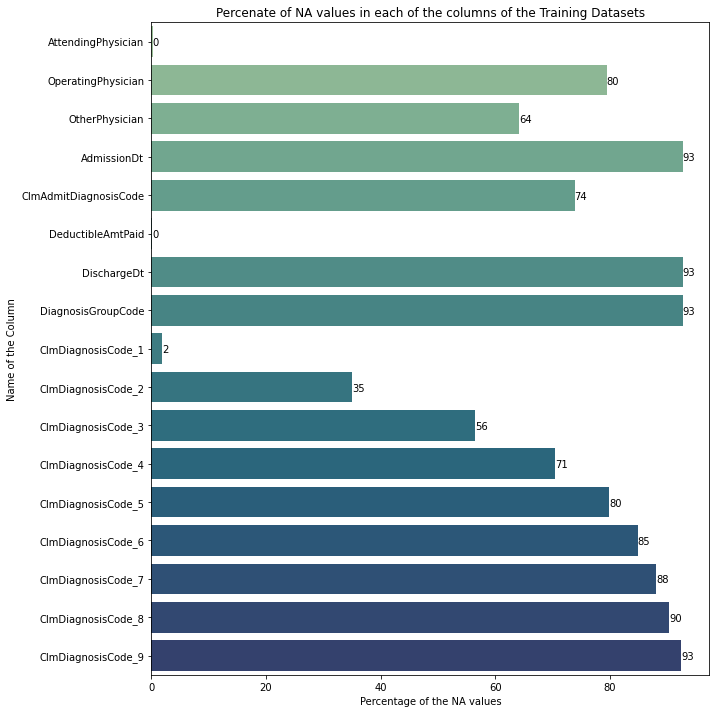

In [ ]:
plt.figure(figsize=(10,12))
ax= sns.barplot(y= na_perc_df['col_name'],x= na_perc_df['na_percentage'],palette='crest')

plt.ylabel("Name of the Column")
plt.xlabel("Percentage of the NA values")
plt.title("Percenate of NA values in each of the columns of the Training Datasets")

#Source: https://medium.com/@dey.mallika/transform-your-graphs-with-seaborn-ea4fa8e606a6
initialx=0
for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,'{:1.0f}'.format(p.get_width()))
    initialx+=1
plt.show()

###<font color='blue'><b>Checking the number of NA values in the Outpatient Dataset just to validate our obsevrations and the feature engineering approach

In [ ]:
print("The NA percentage in the Admission Date variable in Inpatient Data",(train_inpat['AdmissionDt'].isna().sum()/len(train_inpat['AdmissionDt']))*100)
print("The NA percentage in the Discharge Date variable in Inpatient Data",(train_inpat['DischargeDt'].isna().sum()/len(train_inpat['DischargeDt']))*100)

The NA percentage in the Admission Date variable in Inpatient Data 0.0
The NA percentage in the Discharge Date variable in Inpatient Data 0.0


##<font color='green'>**Observations**</b></font>

#### Although we see that Admission Date and the Discharge Date have an NA percentage of 92.5, from the above we see that all the NA values have been added by Outpatient and Beneficary datasets.

#### It needs to be noted that AdmissionDate and DischargeDate columns are bound to be missing in the Inpatient Datasets and the Beneficary Datasets.


##<font color='red'><b>**Feature Engineering**</b></font>
#### I have created a new feature titled "hospital_days" which is taken as a difference between the Discharge Date and the Admission Date features.

#### I have imputed all the missing values in this feature with Zeros.

#### I have categorized the "HospitalDays" feature as keeping it a floating point value will introduce too many features and affect the overall distribution of the variable 

In [ ]:
train_fin["HospitalDays"]= pd.to_datetime(train_fin['DischargeDt']) - pd.to_datetime(train_fin['AdmissionDt'])
train_fin["HospitalDays"]= train_fin["HospitalDays"].dt.days

###<font color='blue'><b>Looking at the distribution of the HospitalDays variable prior to the imputation of the NA values with 0</b></font>

In [ ]:
train_fin["HospitalDays"].describe()

count    40474.000000
mean         5.665168
std          5.638538
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         35.000000
Name: HospitalDays, dtype: float64

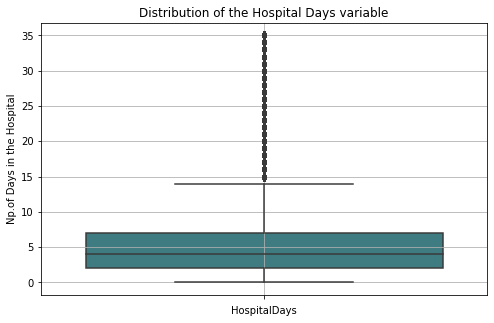

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(y=train_fin['HospitalDays'],palette='crest')
plt.xlabel("HospitalDays")
plt.ylabel("Np.of Days in the Hospital")
plt.title("Distribution of the Hospital Days variable")
plt.grid()
plt.show()

##<font color='blue'><b> Imputing the NA values in the HospitalDates variable with 0 values</b></font>

In [ ]:
train_fin["HospitalDays"]=train_fin["HospitalDays"].fillna(0)

In [ ]:
train_fin["HospitalDays"].describe()

count    558211.000000
mean          0.410762
std           2.112693
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          35.000000
Name: HospitalDays, dtype: float64

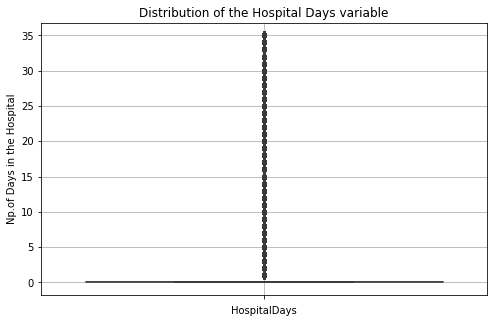

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(y=train_fin['HospitalDays'],palette='crest')
plt.xlabel("HospitalDays")
plt.ylabel("Np.of Days in the Hospital")
plt.title("Distribution of the Hospital Days variable")
plt.grid()
plt.show()

##<font color='green'><b>**Observations**</b></font>

#### From the above two Box plots it is quite evident that the imputation of the NA values wiht 0 has drascitcally impacted the overall distribution of the variable

###<font color='blue'><b> Hence Categorizing the variable as per weeks as it introduces ordinality in the feature as well as seperates out the inpatient and the outpatient data </b></font>

In [ ]:
for i in tqdm(range(len(train_fin["HospitalDays"]))):
    if train_fin["HospitalDays"][i]==0:
        train_fin["HospitalDays"][i]= 0
    if train_fin["HospitalDays"][i]>0 and train_fin["HospitalDays"][i]<=7:
        train_fin["HospitalDays"][i]= 1
    elif train_fin["HospitalDays"][i]>7 and train_fin["HospitalDays"][i]<=14:
        train_fin["HospitalDays"][i]= 2 
    elif train_fin["HospitalDays"][i]>14 and train_fin["HospitalDays"][i]<=21:
        train_fin["HospitalDays"][i]= 3
    elif train_fin["HospitalDays"][i]>21 and train_fin["HospitalDays"][i]<=28:
        train_fin["HospitalDays"][i]= 4
    elif train_fin["HospitalDays"][i]>28:
        train_fin["HospitalDays"][i]= 5

  0%|          | 0/558211 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [ ]:
print(train_fin["HospitalDays"].dtypes)
print(np.unique(train_fin["HospitalDays"]))

float64
[0. 1. 2. 3. 4. 5.]


In [ ]:
print(train_fin["HospitalDays"].value_counts())

0.0    518342
1.0     31108
2.0      5969
3.0      1658
4.0       589
5.0       545
Name: HospitalDays, dtype: int64

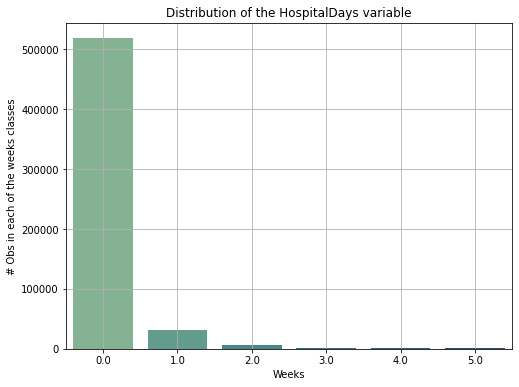

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x= np.unique(train_fin["HospitalDays"]),y= train_fin["HospitalDays"].value_counts(),palette='crest')
plt.xlabel("Weeks")
plt.ylabel("# Obs in each of the weeks classes")
plt.title("Distribution of the HospitalDays variable")
plt.grid()
plt.show()

##<font color='green'><b>**Observations**</b></font>
#### 1. As mentioned above 0 would be the highest as they are the imputed observations from the Inpatient and the Outpatient Datasests

#### 2. Other than 0, we see that the maximum days spent in the hospital is less than or equal to 1 week and the number of observations keep decreasing with more weeks

#### 3. This seems to be the general trend as there are fewer chronic illness cases in a hospital and most of the Inpatients are predominantly admitted for shoter duration of time

##<font color='blue'><b> Dropping the Admission Date and the Discharge Date columns from the dataset</b></font>

In [ ]:
train_fin.drop(['AdmissionDt','DischargeDt'], axis=1, inplace=True)

In [ ]:
train_fin.shape

(558211, 46)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/train_fin2.pkl','wb') as tr_df:
    pickle.dump(train_fin,tr_df)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/train_fin2.pkl','rb') as tr_df:
    train_fin2= pickle.load(tr_df)

In [ ]:
na_col=[]
na_perc= np.round(((train_fin2.isna().sum())/train_fin2.shape[0])*100,2)
na_perc_df= na_perc.to_frame()
na_perc_df.reset_index(inplace= True)
na_perc_df.columns= ["col_name","na_percentage"]
for i in range(na_perc_df.shape[0]):
    if na_perc_df.iloc[i,1] == 0:
        na_col.append(i)  

print(na_col)

[0, 1, 2, 3, 4, 5, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]


In [ ]:
na_perc_df.drop(index=na_col,inplace=True)
na_perc_df.reset_index(drop=True,inplace=True)
print(na_perc_df)

                 col_name  na_percentage
0      AttendingPhysician           0.27
1      OperatingPhysician          79.50
2          OtherPhysician          64.22
3   ClmAdmitDiagnosisCode          73.86
4       DeductibleAmtPaid           0.16
5      DiagnosisGroupCode          92.75
6      ClmDiagnosisCode_1           1.87
7      ClmDiagnosisCode_2          35.04
8      ClmDiagnosisCode_3          56.46
9      ClmDiagnosisCode_4          70.52
10     ClmDiagnosisCode_5          79.95
11     ClmDiagnosisCode_6          84.88
12     ClmDiagnosisCode_7          88.14
13     ClmDiagnosisCode_8          90.43
14     ClmDiagnosisCode_9          92.51


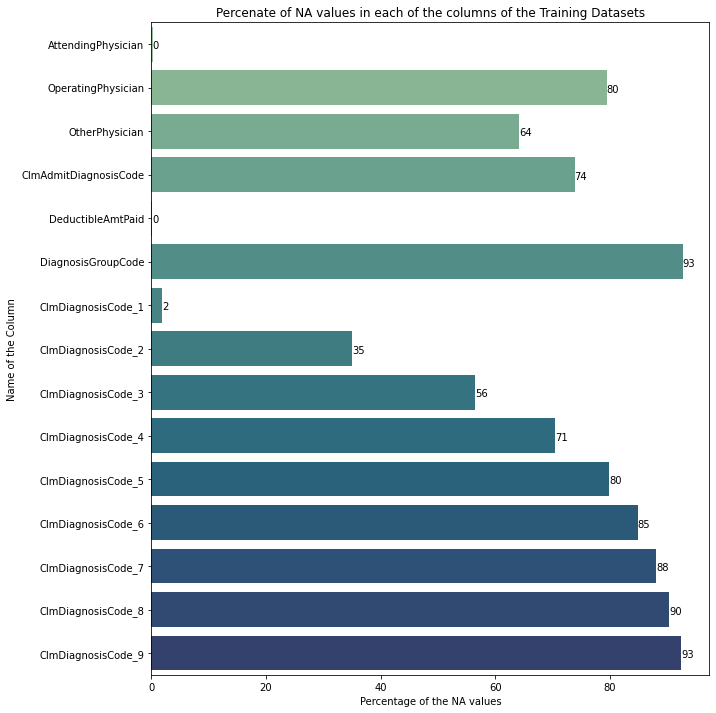

In [ ]:
plt.figure(figsize=(10,12))
ax= sns.barplot(y= na_perc_df['col_name'],x= na_perc_df['na_percentage'],palette='crest')

plt.ylabel("Name of the Column")
plt.xlabel("Percentage of the NA values")
plt.title("Percenate of NA values in each of the columns of the Training Datasets")

#Source: https://medium.com/@dey.mallika/transform-your-graphs-with-seaborn-ea4fa8e606a6
initialx=0
for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,'{:1.0f}'.format(p.get_width()))
    initialx+=1
plt.show()

##<font color='blue'><b>Looking at the distribution of the NA values in the Operating physician and Other physician columns of the Inpatients and the Outpatients datasets</b></font>

NA percent in OperatingPhysician col in Inpatient Data 41.12
NA percent in OtherPhysician col in Inpatient Data 88.41
****************************************************************************************************


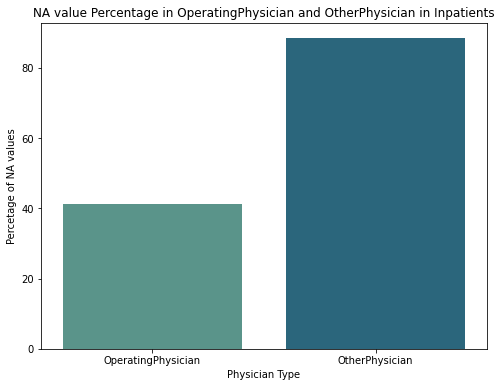

In [ ]:
in_opr_p=np.round((train_inpat['OperatingPhysician'].isna().sum()/len(train_inpat['OperatingPhysician']))*100,2)
in_ot_p= np.round((train_inpat['OtherPhysician'].isna().sum()/len(train_inpat['OtherPhysician']))*100,2)

print("NA percent in OperatingPhysician col in Inpatient Data",in_opr_p)
print("NA percent in OtherPhysician col in Inpatient Data",in_ot_p)
print("*"*100)

plt.figure(figsize=(8,6))
sns.barplot(x=["OperatingPhysician","OtherPhysician"],y=[in_opr_p,in_ot_p], palette='crest')
plt.xlabel("Physician Type")
plt.ylabel("Percetage of NA values")
plt.title("NA value Percentage in OperatingPhysician and OtherPhysician in Inpatients")
#plt.grid()
plt.show()

NA percent in OperatingPhysician col in Inpatient Data 82.5
NA percent in OtherPhysician col in Inpatient Data 62.33
****************************************************************************************************


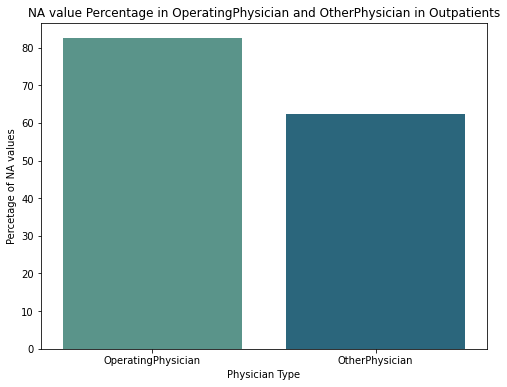

In [ ]:
out_opr_p=np.round((train_outpat['OperatingPhysician'].isna().sum()/len(train_outpat['OperatingPhysician']))*100,2)
out_ot_p= np.round((train_outpat['OtherPhysician'].isna().sum()/len(train_outpat['OtherPhysician']))*100,2)

print("NA percent in OperatingPhysician col in Inpatient Data",out_opr_p)
print("NA percent in OtherPhysician col in Inpatient Data",out_ot_p)

print("*"*100)
plt.figure(figsize=(8,6))
sns.barplot(x=["OperatingPhysician","OtherPhysician"],y=[out_opr_p,out_ot_p], palette='crest')
plt.xlabel("Physician Type")
plt.ylabel("Percetage of NA values")
plt.title("NA value Percentage in OperatingPhysician and OtherPhysician in Outpatients")
#plt.grid()
plt.show()

##<font color='green'><b>**Observations:**

#### 1. The above graphs are inline with the reality or practical situtation. NA values in Operating Physician and Other Physician datasets doesnt mean that the data is missing.

#### 2. As per my secondary research, Operating Physicians are involved in cases where a surgery or other complications are involved

#### 3. OtherPhysicians are involved in cases where the patient has co-morbidities

##<font color='green'><b>**Observations on Inpatient Dataset:**

#### 1. We have 41% NA values in Operating Physicians column. This means the 59% (100%-41%) of the Inpatients likely needed a surgery or had other complication where as 41% didnt have any complications or didnt need surgery 

#### 2. We have 88% NA values in Other Physicians column. This means the 12% (100%-88%) of the Inpatients had co-morbidities where as 12% didnt have co-morbidities 

##<font color='green'><b>**Observations on Outpatient Dataset:**

#### 1. We have 82% NA values in Operating Physicians column. Outpatients do not usually go through surgeries or other complicated procedures in a day 

#### 2. We have 62% NA values in Other Physicians column.Outpatients do not usually consult other physicians very often.

##<font color='blue'><b>Imputing the Attending Physician with Mode or MostFrequent strategy using SimpleImpute</b></font>

In [ ]:
cat_imp= SimpleImputer(missing_values= np.nan, strategy= 'most_frequent')
train_fin2["AttendingPhysician"]= cat_imp.fit_transform(train_fin2['AttendingPhysician'].values.reshape(-1,1))[:,0]

In [ ]:
train_fin2["AttendingPhysician"].isna().sum()

0

##<font color='red'><b>**Feature Engineering**

#### A new column has been created to capture the nature of illness of the patient.This column will be categorical and will have the below categories:

#### 1.Simple 
#### 2.Operating
#### 3.comorbid
#### 4.Operating&comorbid

In [ ]:
train_fin2["IllnessNature"]= np.zeros(len(train_fin2["AttendingPhysician"]))

In [ ]:
for i in tqdm(range(len(train_fin2["AttendingPhysician"]))):
    if pd.isnull(train_fin2["OperatingPhysician"][i])==True and pd.isnull(train_fin2["OtherPhysician"][i])==True:
        train_fin2["IllnessNature"][i]= "simple"
    elif pd.isnull(train_fin2["OperatingPhysician"][i])==True and pd.isnull(train_fin2["OtherPhysician"][i])==False:
        train_fin2["IllnessNature"][i]= "operating"
    elif pd.isnull(train_fin2["OperatingPhysician"][i])==False and pd.isnull(train_fin2["OtherPhysician"][i])==True:
        train_fin2["IllnessNature"][i]= "comorbid"
    elif pd.isnull(train_fin2["OperatingPhysician"][i])==False and pd.isnull(train_fin2["OtherPhysician"][i])==False:
        train_fin2["IllnessNature"][i]= "operating&comorbid"

  0%|          | 0/558211 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [ ]:
print(np.unique(train_fin2["IllnessNature"]))

['comorbid' 'operating' 'operating&comorbid' 'simple']


In [ ]:
train_fin2.drop(['OperatingPhysician','OtherPhysician'], axis=1,inplace=True)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/train_fin3.pkl','wb') as tr_df:
    pickle.dump(train_fin2,tr_df)

In [39]:
with open('/content/drive/MyDrive/Colab Notebooks/train_fin3.pkl','rb') as tr_df:
    train_fin3= pickle.load(tr_df)

In [ ]:
train_fin3["IllnessNature"].value_counts()

simple                288085
operating             155679
comorbid               70390
operating&comorbid     44057
Name: IllnessNature, dtype: int64

Percetage Split of each of categories in Illness Nature variable
simple                51.61
operating             27.89
comorbid              12.61
operating&comorbid     7.89
Name: IllnessNature, dtype: float64


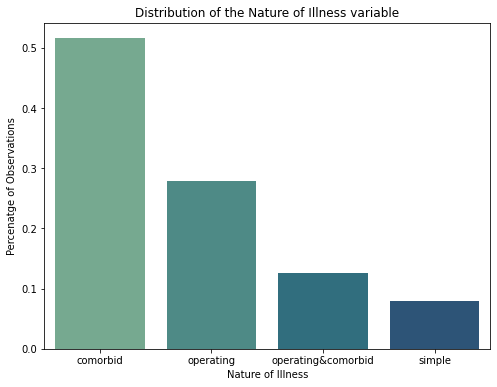

In [ ]:
print("Percetage Split of each of categories in Illness Nature variable")
print(np.round((train_fin3["IllnessNature"].value_counts()/len(train_fin3["IllnessNature"]))*100,2))
plt.figure(figsize=(8,6))
sns.barplot(x= np.unique(train_fin3["IllnessNature"]), y= (train_fin3["IllnessNature"].value_counts()/len(train_fin3["IllnessNature"])),palette='crest')
plt.xlabel("Nature of Illness")
plt.ylabel("Percenatge of Observations")
plt.title("Distribution of the Nature of Illness variable")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


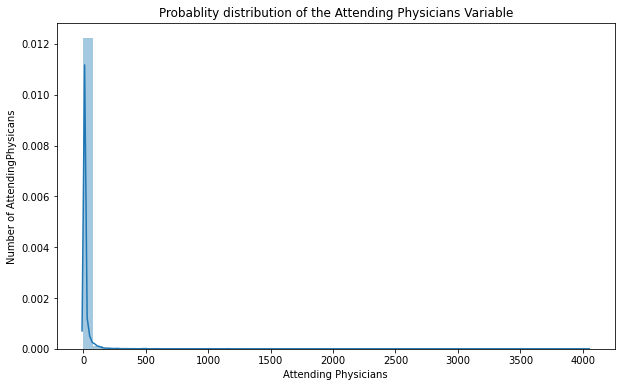

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(train_fin3["AttendingPhysician"].value_counts())
plt.xlabel("Attending Physicians")
plt.ylabel("Number of AttendingPhysicans")
plt.title("Probablity distribution of the Attending Physicians Variable")
plt.show()

##<font color='red'><b>**Feature Engineering**</b></font>

#### Extracting the number of days from the claim start date and the claim end dates by taking a difference

#### Converting the number of days during which the claim was in process into number of weeks

In [40]:
train_fin3["ClaimDays"]= (pd.to_datetime(train_fin3['ClaimEndDt']) - pd.to_datetime(train_fin3['ClaimStartDt'])).dt.days

In [41]:
train_fin3.drop(['ClaimEndDt','ClaimStartDt'],axis=1, inplace=True)

In [7]:
train_fin3["ClaimDays"].describe()

count    558211.000000
mean          1.727940
std           4.904984
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          36.000000
Name: ClaimDays, dtype: float64

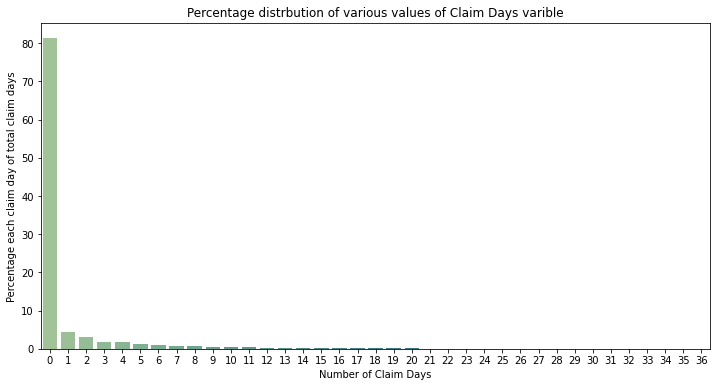

In [20]:
clmdays= np.unique(train_fin3["ClaimDays"])
#print("The Total clmdays)
per_values= np.round((train_fin3["ClaimDays"].value_counts()/len(train_fin3["ClaimDays"]))*100,2)
plt.figure(figsize=(12,6))
ax= sns.barplot(x= np.unique(train_fin3["ClaimDays"]),y= per_values,palette='crest')

plt.xlabel('Number of Claim Days')
plt.ylabel('Percentage each claim day of total claim days')
plt.title('Percentage distrbution of various values of Claim Days varible')
#plt.grid()
plt.show()

##<font color='green'><b>**Observations**</b></font>
#### 1. We see that more than 80% of the claim days are zero and close to 95% of the claim days are less than 7 days. 

#### 2. Keeping the varibale datatype as floating point value will skew the mean and other distribution related parameters

#### 3. Converting the varibale into a Categorical Variable(Ordinal)

In [42]:
for i in tqdm(range(len(train_fin3['ClaimDays']))):
    if train_fin3['ClaimDays'][i]==0:
        train_fin3['ClaimDays'][i]=0 
    elif train_fin3['ClaimDays'][i]>0 and train_fin3['ClaimDays'][i]<=7:
        train_fin3['ClaimDays'][i]= 1
    elif train_fin3['ClaimDays'][i]>7 and train_fin3['ClaimDays'][i]<=14:
        train_fin3['ClaimDays'][i]= 2
    elif train_fin3['ClaimDays'][i]> 14 and train_fin3['ClaimDays'][i]<=21:
        train_fin3['ClaimDays'][i]= 3
    elif train_fin3['ClaimDays'][i]>21 and train_fin3['ClaimDays'][i]<=28:
        train_fin3['ClaimDays'][i]= 4
    elif train_fin3['ClaimDays'][i]>28 and train_fin3['ClaimDays'][i]<=35:
        train_fin3['ClaimDays'][i]=5
    elif train_fin3['ClaimDays'][i]>35:
        train_fin3['ClaimDays'][i]=6

  0%|          | 0/558211 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [43]:
train_fin3["ClaimDays"].value_counts()

0    453953
1     57655
3     30415
2     15059
4       589
5       538
6         2
Name: ClaimDays, dtype: int64

0    81.32
1    10.33
3     5.45
2     2.70
4     0.11
5     0.10
6     0.00
Name: ClaimDays, dtype: float64


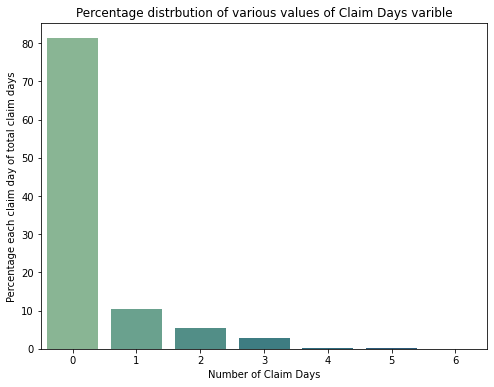

In [47]:
clmdays= np.unique(train_fin3["ClaimDays"])
#print("The Total clmdays)
per_values= np.round((train_fin3["ClaimDays"].value_counts()/len(train_fin3["ClaimDays"]))*100,2)
print(per_values)
plt.figure(figsize=(8,6))
ax= sns.barplot(x= np.unique(train_fin3["ClaimDays"]),y= per_values,palette='crest')

plt.xlabel('Number of Claim Days')
plt.ylabel('Percentage each claim day of total claim days')
plt.title('Percentage distrbution of various values of Claim Days varible')
#plt.grid()
plt.show()

In [48]:
train_fin3.shape

(558211, 44)

In [46]:
train_fin3.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,HospitalDays,IllnessNature,ClaimDays
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,7866,1068.0,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,1943-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,Yes,1.0,simple,1
1,BENE16973,CLM565430,PRV55912,50,PHY365867,NaN,0.0,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,1932-05-01,1,1,0,39,310,12,12,1,1,1,2,2,2,2,1,2,2,2,24000,2136,450,200,Yes,0.0,comorbid,0
2,BENE17521,CLM34721,PRV55912,19000,PHY349293,45340,1068.0,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,1913-12-01,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,Yes,2.0,operating&comorbid,2
3,BENE21718,CLM72336,PRV55912,17000,PHY334706,V5789,1068.0,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,1922-10-01,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,Yes,3.0,comorbid,3
4,BENE22934,CLM73394,PRV55912,13000,PHY390614,71946,1068.0,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,1930-07-01,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,Yes,1.0,operating&comorbid,1


In [50]:
print(train_fin3['DiagnosisGroupCode'].value_counts())

882    179
884    174
166    168
183    165
939    163
      ... 
927      1
934      1
955      1
765      1
775      1
Name: DiagnosisGroupCode, Length: 736, dtype: int64


In [52]:
print(train_fin3['DiagnosisGroupCode'].describe())

count     40474
unique      736
top         882
freq        179
Name: DiagnosisGroupCode, dtype: object


In [ ]:
print(na_perc_df)

                 col_name  na_percentage
0      AttendingPhysician           0.27
1      OperatingPhysician          79.50
2          OtherPhysician          64.22
3             AdmissionDt          92.75
4   ClmAdmitDiagnosisCode          73.86
5       DeductibleAmtPaid           0.16
6             DischargeDt          92.75
7      DiagnosisGroupCode          92.75
8      ClmDiagnosisCode_1           1.87
9      ClmDiagnosisCode_2          35.04
10     ClmDiagnosisCode_3          56.46
11     ClmDiagnosisCode_4          70.52
12     ClmDiagnosisCode_5          79.95
13     ClmDiagnosisCode_6          84.88
14     ClmDiagnosisCode_7          88.14
15     ClmDiagnosisCode_8          90.43
16     ClmDiagnosisCode_9          92.51
17    ClmDiagnosisCode_10          99.10
18     ClmProcedureCode_1          95.82
19     ClmProcedureCode_2          99.02
20     ClmProcedureCode_3          99.83
21     ClmProcedureCode_4          99.98
22     ClmProcedureCode_5         100.00
23     ClmProced

In [ ]:
na_col=[]
for i in range(na_perc_df.shape[0]):
    if na_perc_df.iloc[i,1]>95:
        na_col.append(i)  

print(na_col)

[17, 18, 19, 20, 21, 22, 23, 24]


In [ ]:
na_perc_df.drop(index=na_col,inplace=True)
print(na_perc_df)

                 col_name  na_percentage
0      AttendingPhysician           0.27
1      OperatingPhysician          79.50
2          OtherPhysician          64.22
3             AdmissionDt          92.75
4   ClmAdmitDiagnosisCode          73.86
5       DeductibleAmtPaid           0.16
6             DischargeDt          92.75
7      DiagnosisGroupCode          92.75
8      ClmDiagnosisCode_1           1.87
9      ClmDiagnosisCode_2          35.04
10     ClmDiagnosisCode_3          56.46
11     ClmDiagnosisCode_4          70.52
12     ClmDiagnosisCode_5          79.95
13     ClmDiagnosisCode_6          84.88
14     ClmDiagnosisCode_7          88.14
15     ClmDiagnosisCode_8          90.43
16     ClmDiagnosisCode_9          92.51


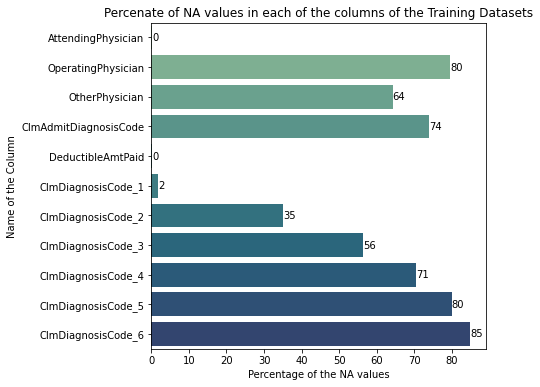

In [ ]:
plt.figure(figsize=(6,6))
ax= sns.barplot(y= na_perc_df['col_name'],x= na_perc_df['na_percentage'],palette='crest')

plt.ylabel("Name of the Column")
plt.xlabel("Percentage of the NA values")
plt.title("Percenate of NA values in each of the columns of the Training Datasets")

#Source: https://medium.com/@dey.mallika/transform-your-graphs-with-seaborn-ea4fa8e606a6
initialx=0
for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,'{:1.0f}'.format(p.get_width()))
    initialx+=1
plt.show()

##<font color='green'><b>**Observations:**</b></font>

#### 1. We see that after dropping some columns with more than 95% NA values,the NA values for the columns are in various ranges of percentages and different datatypes.

#### 2. Hence we need to adopt different strategies to impute to suit the datatypes and percentage of NA values.

#### 3. There is only one Float feature "Deductible Amount" with about 0.16% of NA values, hence a simple mean imputation will be adopted

#### 4. All the remaining features with NA values are the categorical datatypes with varying percentages of NA values. A simple "Mode" or "Most Frequent" strategy will be adopted for the varibles with NA percentages of less than 5%.

#### 5. In accordance point 4, we willbe using the "Mode" strategy for the imputation of "Attending Physician" and "ClmDiagnosisCode_1" variables. 

###<font color='blue'><b>Mean strategy imputation of the "DeductibleAmtPaid" variable (float datatype)</b></font>

In [ ]:
num_imp= SimpleImputer(missing_values=np.nan, strategy= 'mean')
train_fin["DeductibleAmtPaid"]= num_imp.fit_transform(train_fin['DeductibleAmtPaid'].values.reshape(-1,1))[:,0]

###<font color='blue'><b>Mode strategy imputation of the "AttendingPhysician" and "ClmDiagnosisCode_1" variable (Categorical/String datatype)</b></font>

In [ ]:
cat_imp= SimpleImputer(missing_values= np.nan, strategy= 'most_frequent')
train_fin["AttendingPhysician"]= cat_imp.fit_transform(train_fin['AttendingPhysician'].values.reshape(-1,1))[:,0]
train_fin["ClmDiagnosisCode_1"]= cat_imp.fit_transform(train_fin['ClmDiagnosisCode_1'].values.reshape(-1,1))[:,0]

In [ ]:
na_perc_df.drop(index=[0,5,8],inplace=True)
na_perc_df.reset_index(drop=True,inplace=True)
print(na_perc_df)

                col_name  na_percentage
0     OperatingPhysician          79.50
1         OtherPhysician          64.22
2  ClmAdmitDiagnosisCode          73.86
3     ClmDiagnosisCode_2          35.04
4     ClmDiagnosisCode_3          56.46
5     ClmDiagnosisCode_4          70.52
6     ClmDiagnosisCode_5          79.95
7     ClmDiagnosisCode_6          84.88


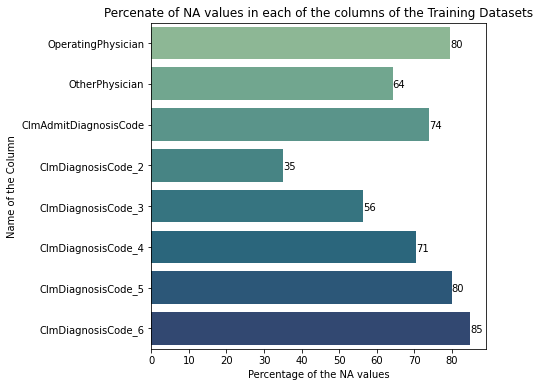

In [ ]:
plt.figure(figsize=(6,6))
ax= sns.barplot(y= na_perc_df['col_name'],x= na_perc_df['na_percentage'],palette='crest')

plt.ylabel("Name of the Column")
plt.xlabel("Percentage of the NA values")
plt.title("Percenate of NA values in each of the columns of the Training Datasets")

#Source: https://medium.com/@dey.mallika/transform-your-graphs-with-seaborn-ea4fa8e606a6
initialx=0
for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,'{:1.0f}'.format(p.get_width()))
    initialx+=1
plt.show()

##<font color='green'><b>**Observations:**</b></font>

#### 1. We observe that all the remaining columns wiht NA values are of the Object or the string datatype with varying percentages of NA values.

#### 2. All the missing or NA values in the columns with NA percenate greater than 70% will be imputed or replaced wiht a custom class called "missing". As we do not have enough information in each of the columns to use any of the exisitng imputation techniques might introduce Bias in the data. 

####Columns to be imputed with "Missing": [OperatingPhysician,ClmAdmitDiagnosisCode, ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_5]

#### 3. The columns with "NA" values between 35% and 70% will be imputed using the KNN imputer

####Columns to be imputed with "KNN": [ClmDiagnosisCode_2,ClmDiagnosisCode_3,OtherPhysician]



In [ ]:
train_fin["OperatingPhysician"]= train_fin["OperatingPhysician"].fillna('missing')
train_fin["ClmAdmitDiagnosisCode"]= train_fin["ClmAdmitDiagnosisCode"].fillna('missing')
train_fin["ClmDiagnosisCode_4"]= train_fin["ClmDiagnosisCode_4"].fillna('missing')
train_fin["ClmDiagnosisCode_5"]= train_fin["ClmDiagnosisCode_5"].fillna('missing')
train_fin["ClmDiagnosisCode_6"]= train_fin["ClmDiagnosisCode_6"].fillna('missing') 

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/train_fin.pkl','wb') as tr_df:
    pickle.dump(train_fin,tr_df)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/train_fin.pkl','rb') as tr_df:
    train_fin= pickle.load(tr_df)

In [ ]:
train_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 41 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               558211 non-null  object 
 7   OperatingPhysician               558211 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   ClmAdmitDiagnosisCode            558211 non-null  object 
 10  DeductibleAmtPaid                558211 non-null  float64
 11  ClmDiagnosisCode_1               558211 non-null  object 
 12  Cl

In [ ]:
train_fin.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,missing,NaN,7866,1068.0,1970,4019,5853,7843,2768,71590,1943-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,missing,0.0,V7183,53081,78959,4280,E8788,78079,1932-05-01,1,1,0,39,310,12,12,1,1,1,2,2,2,2,1,2,2,2,24000,2136,450,200,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,45340,1068.0,4240,2639,2948,40390,45821,28489,1913-12-01,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,V5789,1068.0,V5789,4168,73313,7812,7993,78830,1922-10-01,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,71946,1068.0,71535,71960,4019,V1202,4240,2449,1930-07-01,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,Yes


In [ ]:
train_fin["ClaimDays"]=train_fin["ClaimEndDt"]-train_fin['ClaimStartDt']


In [ ]:
with open('')

##Univariate Analysis of the Inpatient Data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


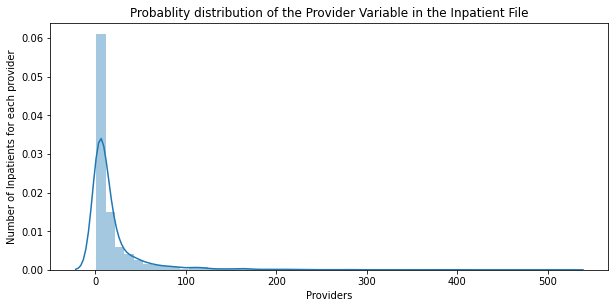

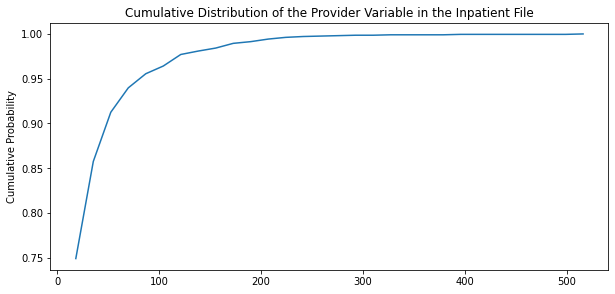

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.distplot(tr_inpat_new['Provider'].value_counts())
plt.xlabel("Providers")
plt.ylabel("Number of Inpatients for each provider")
plt.title("Probablity distribution of the Provider Variable in the Inpatient File")
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
counts,bin_edges= np.histogram(tr_inpat_new['Provider'].value_counts(),bins=30)
pdf= counts/sum(counts)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of the Provider Variable in the Inpatient File')
plt.show()

We see from the Cumulative distribution function that about 95% of the providers have 75 or fewer occurences of claims in the Inpatient Data while the most number of claims i.e. 100 and above occurences have been tagged to 5% or less number of Provider IDs

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


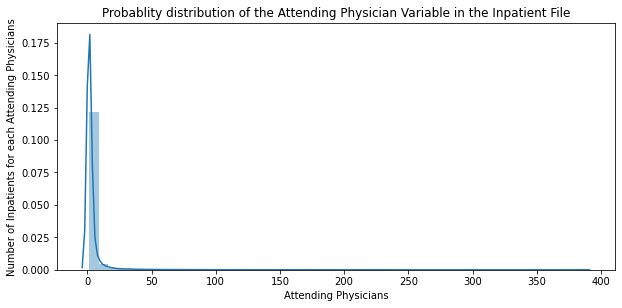

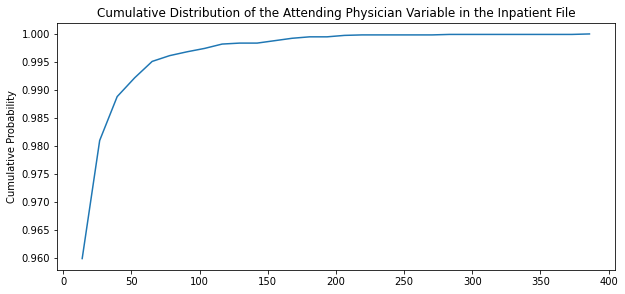

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.distplot(tr_inpat_new['AttendingPhysician'].value_counts())
plt.xlabel("Attending Physicians")
plt.ylabel("Number of Inpatients for each Attending Physicians")
plt.title("Probablity distribution of the Attending Physician Variable in the Inpatient File")
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
counts,bin_edges= np.histogram(tr_inpat_new['AttendingPhysician'].value_counts(),bins=30)
pdf= counts/sum(counts)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of the Attending Physician Variable in the Inpatient File')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.distplot(tr_inpat_new['OperatingPhysician'].value_counts())
plt.xlabel("Operating Physicians")
plt.ylabel("Number of Inpatients for each Operating Physicians")
plt.title("Probablity distribution of the Operating Physician Variable in the Inpatient File")
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
counts,bin_edges= np.histogram(tr_inpat_new['OperatingPhysician'].value_counts(),bins=10)
pdf= counts/sum(counts)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of the Operating Physician Variable in the Inpatient File')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


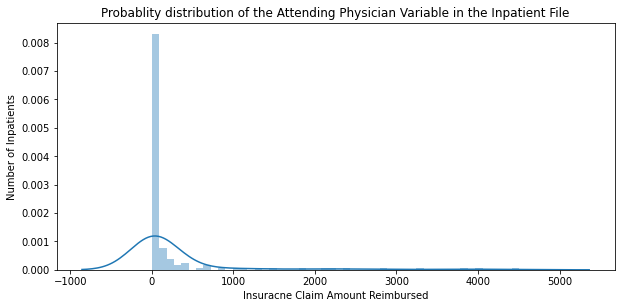

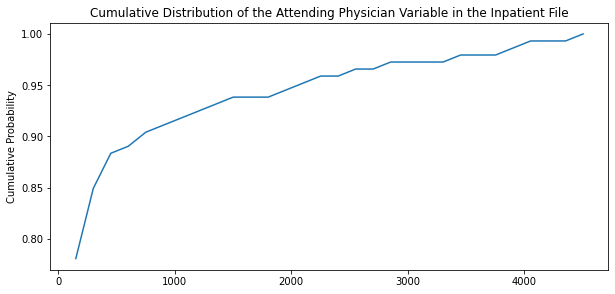

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.distplot(tr_inpat_new['InscClaimAmtReimbursed'].value_counts())
plt.xlabel("Insuracne Claim Amount Reimbursed")
plt.ylabel("Number of Inpatients")
plt.title("Probablity distribution of the Attending Physician Variable in the Inpatient File")
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
counts,bin_edges= np.histogram(tr_inpat_new['InscClaimAmtReimbursed'].value_counts(),bins=30)
pdf= counts/sum(counts)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of the Attending Physician Variable in the Inpatient File')
plt.show()

**Checking for the Number of Unique values in the Deductible Amount Column.**

In [ ]:
len(np.unique(np.array(tr_inpat_new['DeductibleAmtPaid'])))

1

There is just the one value across all the rows in the Inpatient dataset, hence dropping the column completely as the column is not adding any variance to the classification of the dependent variable.

In [ ]:
tr_inpat_new.drop(['DeductibleAmtPaid'], axis=1, inplace= True)

In [ ]:
tr_inpat_new.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,class
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,missing,2009-04-12,7866,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,missing,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,2009-08-31,6186,2009-09-02,750,6186,2948,56400,4019,4019,4019,4019,missing,missing,7092,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,missing,2009-09-17,29590,2009-09-20,883,29623,30390,71690,34590,V1581,32723,4019,missing,missing,missing,No


In [ ]:
tr_inpat_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BeneID                  40474 non-null  object        
 1   ClaimID                 40474 non-null  object        
 2   ClaimStartDt            40474 non-null  datetime64[ns]
 3   ClaimEndDt              40474 non-null  datetime64[ns]
 4   Provider                40474 non-null  object        
 5   InscClaimAmtReimbursed  40474 non-null  int64         
 6   AttendingPhysician      40474 non-null  object        
 7   OperatingPhysician      40474 non-null  object        
 8   AdmissionDt             40474 non-null  datetime64[ns]
 9   ClmAdmitDiagnosisCode   40474 non-null  object        
 10  DischargeDt             40474 non-null  datetime64[ns]
 11  DiagnosisGroupCode      40474 non-null  object        
 12  ClmDiagnosisCode_1      40474 non-null  object

In [ ]:
tr_inpat_new["days_admission"]= tr_inpat_new['DischargeDt']-tr_inpat_new['AdmissionDt']
tr_inpat_new["days_of_claim"]= tr_inpat_new['ClaimEndDt']-tr_inpat_new['ClaimStartDt']

In [ ]:
tr_inpat_new["days_admission"]= tr_inpat_new["days_admission"].dt.days
tr_inpat_new["days_of_claim"]= tr_inpat_new["days_of_claim"].dt.days

In [ ]:
tr_inpat_new.drop(['DischargeDt','AdmissionDt','ClaimEndDt','ClaimStartDt'], axis=1, inplace= True)

In [ ]:
tr_inpat_new.head(3)

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,ClmAdmitDiagnosisCode,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,class,days_admission,days_of_claim
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,missing,7866,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,missing,Yes,6,6
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,PHY318495,6186,750,6186,2948,56400,4019,4019,4019,4019,missing,missing,7092,No,2,2
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,missing,29590,883,29623,30390,71690,34590,V1581,32723,4019,missing,missing,missing,No,3,3


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/tr_inp_new.pkl', 'wb') as inp_new:
    pickle.dump(tr_inpat_new,inp_new)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/tr_inp_new.pkl', 'rb') as inp_new:
    tr_inp_new= pickle.load(inp_new)

##**Analysis of the Outpatient Dataset**

In [ ]:
train_outpat.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [ ]:
((train_outpat.isna().sum())/(train_outpat.shape[0]))*100

BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.269635
OperatingPhysician         82.497484
OtherPhysician             62.327205
ClmDiagnosisCode_1          2.018979
ClmDiagnosisCode_2         37.737307
ClmDiagnosisCode_3         60.741264
ClmDiagnosisCode_4         75.741351
ClmDiagnosisCode_5         85.640586
ClmDiagnosisCode_6         90.582864
ClmDiagnosisCode_7         93.633640
ClmDiagnosisCode_8         95.574587
ClmDiagnosisCode_9         97.134066
ClmDiagnosisCode_10        99.790820
ClmProcedureCode_1         99.968710
ClmProcedureCode_2         99.993047
ClmProcedureCode_3         99.999227
ClmProcedureCode_4         99.999614
ClmProcedureCode_5        100.000000
ClmProcedureCode_6        100.000000
DeductibleAmtPaid           0.000000
ClmAdmitDiagnosisCode      79.637345
d

In [ ]:
train_outpat.drop(['OperatingPhysician','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10','ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6','ClmAdmitDiagnosisCode'], axis=1, inplace= True)

In [ ]:
((train_outpat.isna().sum())/(train_outpat.shape[0]))*100

BeneID                     0.000000
ClaimID                    0.000000
ClaimStartDt               0.000000
ClaimEndDt                 0.000000
Provider                   0.000000
InscClaimAmtReimbursed     0.000000
AttendingPhysician         0.269635
OtherPhysician            62.327205
ClmDiagnosisCode_1         2.018979
ClmDiagnosisCode_2        37.737307
ClmDiagnosisCode_3        60.741264
DeductibleAmtPaid          0.000000
dtype: float64

In [ ]:
train_outpat["AttendingPhysician"]= imp_cat.fit_transform(train_outpat["AttendingPhysician"].values.reshape(-1,1))[:,0]
train_outpat["ClmDiagnosisCode_1"]= imp_cat.fit_transform(train_outpat["ClmDiagnosisCode_1"].values.reshape(-1,1))[:,0]

In [ ]:
train_outpat["OtherPhysician"]= train_outpat["OtherPhysician"].fillna("missing")
train_outpat["ClmDiagnosisCode_2"]= train_outpat["ClmDiagnosisCode_2"].fillna("missing")
train_outpat["ClmDiagnosisCode_3"]= train_outpat["ClmDiagnosisCode_3"].fillna("missing")

In [ ]:
((train_outpat.isna().sum())/(train_outpat.shape[0]))*100

BeneID                    0.0
ClaimID                   0.0
ClaimStartDt              0.0
ClaimEndDt                0.0
Provider                  0.0
InscClaimAmtReimbursed    0.0
AttendingPhysician        0.0
OtherPhysician            0.0
ClmDiagnosisCode_1        0.0
ClmDiagnosisCode_2        0.0
ClmDiagnosisCode_3        0.0
DeductibleAmtPaid         0.0
dtype: float64

In [ ]:
train_outpat["days_of_claim"]= train_outpat['ClaimEndDt']-train_outpat['ClaimStartDt']
train_outpat["days_of_claim"]= train_outpat["days_of_claim"].dt.days

In [ ]:
train_outpat.drop(['ClaimStartDt','ClaimEndDt'], axis=1, inplace=True)

In [ ]:
train_outpat.head(3)

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,DeductibleAmtPaid,days_of_claim
0,BENE11002,CLM624349,PRV56011,30,PHY326117,missing,78943,V5866,V1272,0,0
1,BENE11003,CLM189947,PRV57610,80,PHY362868,missing,6115,missing,missing,0,0
2,BENE11003,CLM438021,PRV57595,10,PHY328821,missing,2723,missing,missing,0,0


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/train_outpat.pkl', 'wb') as tr_out:
    pickle.dump(train_outpat,tr_out)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/train_outpat.pkl', 'rb') as tr_out:
    train_outpat= pickle.load(tr_out)

##**Analysis of the Beneficary Dataset**

In [ ]:
train_ben.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40


In [ ]:
((train_ben.isna().sum())/(train_ben.shape[0]))*100

BeneID                              0.000000
DOB                                 0.000000
DOD                                98.974422
Gender                              0.000000
Race                                0.000000
RenalDiseaseIndicator               0.000000
State                               0.000000
County                              0.000000
NoOfMonths_PartACov                 0.000000
NoOfMonths_PartBCov                 0.000000
ChronicCond_Alzheimer               0.000000
ChronicCond_Heartfailure            0.000000
ChronicCond_KidneyDisease           0.000000
ChronicCond_Cancer                  0.000000
ChronicCond_ObstrPulmonary          0.000000
ChronicCond_Depression              0.000000
ChronicCond_Diabetes                0.000000
ChronicCond_IschemicHeart           0.000000
ChronicCond_Osteoporasis            0.000000
ChronicCond_rheumatoidarthritis     0.000000
ChronicCond_stroke                  0.000000
IPAnnualReimbursementAmt            0.000000
IPAnnualDe

In [ ]:
train_ben.drop(['DOD'], axis=1, inplace= True)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/train_ben.pkl','wb') as tr_ben:
    pickle.dump(train_ben,tr_ben)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/train_outpat.pkl', 'rb') as tr_ben:
    train_ben= pickle.load(tr_ben)

In [ ]:
train_ben['NoOfMonths_PartACov'].equals(train_ben['NoOfMonths_PartBCov'])

False

In [ ]:
y= pd.DatetimeIndex(train_ben['DOB']).month

In [ ]:
y[:5]

Int64Index([1, 9, 8, 7, 9], dtype='int64', name='DOB')

In [ ]:
clm_dia_cod1= set(train_inpat["ClmDiagnosisCode_1"]).intersection(set(train_outpat["ClmDiagnosisCode_1"]))
print(len(clm_dia_cod1))

2158


In [ ]:
train_inpat["ClmDiagnosisCode_1"].isna().sum()

0

In [ ]:
print("Shape of the Inpatient Dataset post Imputation: ", tr_inpat_new.shape)
print("Shape of the Outpatient Dataset post Imputation: ", train_outpat.shape)
print("Shape of the Beneficiary Dataset post Imputation: ", train_ben.shape)

Shape of the Inpatient Dataset post Imputation:  (40474, 21)
Shape of the Outpatient Dataset post Imputation:  (517737, 11)
Shape of the Beneficiary Dataset post Imputation:  (138556, 24)


In [ ]:
ClaimID
BeneID

In [ ]:
claimids= set(train_inpat["ClaimID"]).intersection(set(train_outpat["ClaimID"]))
print("No.of Common Claim IDs between Inpatient and Outpatient Datasets: ",len(claimids))

benids1= set(train_inpat["BeneID"]).intersection(set(train_outpat["BeneID"]))
print("No.of Common Beneficiary IDs between Inpatient and Outpatient Datasets: ",len(benids1))

benids2= set(train_inpat["BeneID"]).intersection(set(train_ben["BeneID"]))
print("No.of Common Beneficiary IDs between inpatient and Beneficiary Datasets: ",len(benids2))

benids3= set(train_outpat["BeneID"]).intersection(set(train_ben["BeneID"]))
print("Np.of Common Beneficiary IDs between Outpatient and Beneficiary Datasets: ",len(benids3))

No.of Common Claim IDs between Inpatient and Outpatient Datasets:  0
No.of Common Beneficiary IDs between Inpatient and Outpatient Datasets:  26713
No.of Common Beneficiary IDs between inpatient and Beneficiary Datasets:  31289
Np.of Common Beneficiary IDs between Outpatient and Beneficiary Datasets:  133980


##**Merging the Inpatient, Outpatient and Beneficiary Dataframes**

In [ ]:
df_in_out= pd.merge(train_outpat, tr_inpat_new, how='outer', left_on= ["ClaimID"], right_on=["ClaimID"])
print(df_in_out.shape)

(558211, 31)


In [ ]:
df_in_out.columns

Index(['BeneID_x', 'ClaimID', 'Provider_x', 'InscClaimAmtReimbursed_x',
       'AttendingPhysician_x', 'OtherPhysician', 'ClmDiagnosisCode_1_x',
       'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'DeductibleAmtPaid',
       'days_of_claim_x', 'BeneID_y', 'Provider_y', 'InscClaimAmtReimbursed_y',
       'AttendingPhysician_y', 'OperatingPhysician', 'ClmAdmitDiagnosisCode',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1_y', 'ClmDiagnosisCode_2_y',
       'ClmDiagnosisCode_3_y', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmProcedureCode_1', 'class', 'days_admission',
       'days_of_claim_y'],
      dtype='object')

In [ ]:
df_final= pd.merge(df_in_out,train_ben, how='outer',left_on= 'BeneID', right_on='BeneID')
print(df_final.shape)

KeyError: ignored